# Bloco 2

<p align="justify">
Este trabalho é referente as tarefas desenvolvidas no Bloco 2. Espera-se desenvolver um projeto capaz de utilizar os comandos aprendidos pela linguagem de programação Python, na disciplina de Aprendizado de Máquina, além de desenvolver um sistema de previsão através de Machine Learning. Neste bloco, as discentes estão aplicando modelos de treinamento de Machine Learning e analisando o metódo que melhor se adequa a target e os features estabelecidos. O grupo desenvolvedor é composto pelas discentes:
<p align="justify">
Isabela Bento Beneti </p>
<p align="justify">
Monyque Karoline de Paula Silva </p>
<p align="justify">
Sofia Baccega C.C. de Oliveira </p>
<p align="justify">
Sophia Figueiredo Michel </p>
<hr>

### **COLETA DE DADOS**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree, utils, preprocessing
from itertools import product
from matplotlib import pyplot as plt

In [4]:
#Dados do Cerrado Brasileiro, armazenados mensalmente via .csv
arquivos = ['janeiro.csv','fev.csv','marco.csv','abril.csv','maio.csv','junho.csv','julho.csv']

In [5]:
def read_csv(list_of_files):
    dfs = []
    for x in list_of_files:
        file = pd.read_csv(x, sep=',')
        dfs.append(file)
    df = pd.concat(dfs).reset_index(drop=True)
        
    return df

In [6]:
meses = read_csv(arquivos)

In [7]:
#Dados trabalhados para a eliminação de NaN nas colunas e identificação dos tipos de dados
meses.convert_dtypes()
meses.dropna(how='any', inplace=True)

In [8]:
meses.drop(columns=['Unnamed: 0','estado', 'satelite', 'municipio', 'pais', 'municipio_id', 'estado_id', 'pais_id', 'bioma'], axis = 1, inplace=True)

In [9]:
meses_fogo = meses['risco_fogo'] > 0
meses = meses[meses_fogo]

In [10]:
meses = meses.reset_index()
del meses['index']
display(meses)

,lat,lon,data_hora_gmt,numero_dias_sem_chuva,precipitacao,risco_fogo
0,-12.314859,-43.234066,2022-03-02 01:05:48,9.0,2.7,1.0
1,-20.227880,-46.415940,2022-03-02 01:28:00,8.0,0.0,0.3
2,-20.229250,-46.426820,2022-03-02 01:28:00,8.0,0.0,0.3
3,-20.238930,-46.425510,2022-03-02 01:28:00,8.0,0.0,0.4
4,-20.237550,-46.414600,2022-03-02 01:28:00,8.0,0.0,0.4
...,...,...,...,...,...,...
265136,-6.360000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0
265137,-6.360000,-45.690000,2022-07-29 23:54:47,46.0,0.0,1.0
265138,-6.400000,-44.140000,2022-07-29 23:54:47,34.0,0.0,1.0
265139,-6.350000,-45.670000,2022-07-29 23:54:47,46.0,0.0,1.0


<hr>

### DEFINIÇÕES DE TREINO E TESTE - PARAMETRIZAÇÕES

In [11]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["risco_fogo"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

<hr>

### **TREINO DE MODELOS NORMALIZADOS:**

In [12]:
#Normalização
normalizador_x = MinMaxScaler()
normalizador_y = MinMaxScaler()

normalizador_x.fit(X_treino)
normalizador_y.fit(y_treino)

MinMaxScaler()

## 1. Baseline

In [13]:
# Criar  o modelo
modelo_baseline = DummyRegressor()
# Treinar o modelo
modelo_baseline.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))

# Realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(normalizador_x.transform(X_treino))
print(previsao)

[0.84847435 0.84847435 0.84847435 ... 0.84847435 0.84847435 0.84847435]


In [14]:
#Análise do RMSE
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}")

O RMSE do modelo baseline foi de 0.25423701029201057


##### MODELO DE PREVISÃO

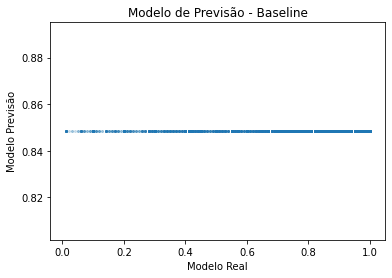

In [15]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Baseline")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 

Este modelo realiza a média de todos os valores normalizados do modelo, apresentando uma resolução com eficiência baixa, a qual possui 25% de erro de predição.

## 2. K-vizinhos mais próximos

In [16]:
# cria o modelo
modelo_knm = KNeighborsRegressor()

# treina o modelo
modelo_knm.fit(normalizador_x.transform(X_treino),normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_knm.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[1.  ]
 [1.  ]
 [0.97]
 ...
 [1.  ]
 [0.98]
 [1.  ]]


#### Hiperparâmetros - Analisar qual o melhor k-NN

In [17]:
erro = []

for n in range(1, 11):
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = normalizador_y.transform(y_teste)
    y_previsao = modelo_knn.predict(normalizador_x.transform(X_teste))
    y_previsao = normalizador_y.inverse_transform(y_previsao)
    erro.append(np.mean(y_previsao != y_verdadeiro))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n} foi de {RMSE}.")

O RMSE do modelo k-NN usando k = 1 foi de 0.06953842803629365.
O RMSE do modelo k-NN usando k = 2 foi de 0.07485483811300009.
O RMSE do modelo k-NN usando k = 3 foi de 0.08021297405419235.
O RMSE do modelo k-NN usando k = 4 foi de 0.0847446520511005.
O RMSE do modelo k-NN usando k = 5 foi de 0.08843453046819148.
O RMSE do modelo k-NN usando k = 6 foi de 0.09124067072839374.
O RMSE do modelo k-NN usando k = 7 foi de 0.09396136661637541.
O RMSE do modelo k-NN usando k = 8 foi de 0.09655897528356704.
O RMSE do modelo k-NN usando k = 9 foi de 0.09885719729467433.
O RMSE do modelo k-NN usando k = 10 foi de 0.10112777102375806.


##### ANÁLISE DOS RESULTADOS OBTIDOS 

Observou-se que em números menores de vizinhos, há uma melhor predição do modelo devido a diminuição da taxa de erro. De modo a realizar esta análise por um meio visual, desenvolve-se uma representação por meio de um gráfico que demonstra a taxa de erro do treino conforme há a mudança dos vizinhos (*k*).

##### REPRESENTAÇÃO VISUAL DO MELHOR *K*

Text(0, 0.5, 'Erro')

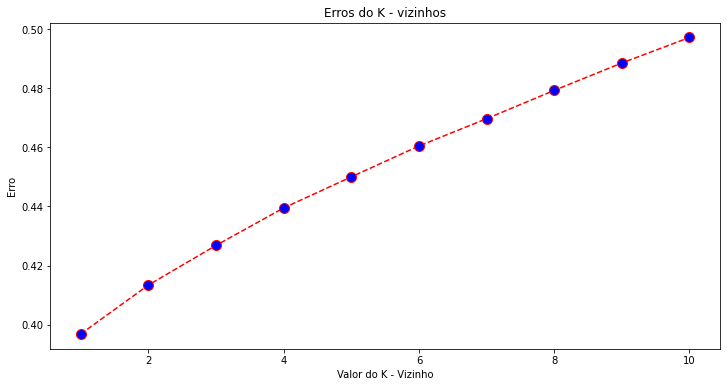

In [18]:
#Plot e caracterização do gráfico
plt.figure(figsize=(12, 6))  
# K analisados de 1 a 10.
plt.plot(range(1, 11), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erros do K - vizinhos')  
plt.xlabel('Valor do K - Vizinho')  
plt.ylabel('Erro') 

##### MODELO DE PREVISÃO

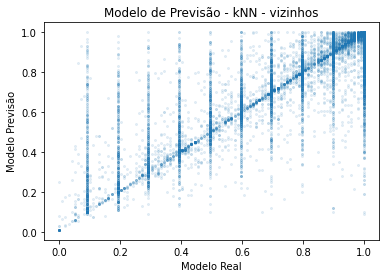

In [19]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - kNN - vizinhos")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### Comparação Baseline & K-NN 

O metódo de k-vizinhos mais próximos foi utilizado com a realização de dez *k* distintos que vão de um a dez. Após uma série de testes, obteve-se os seguintes resultados de RSME:

 <ul>
 <li> O RMSE do modelo k-NN usando k = 1 foi de 0.06953842803629365.  </li>
 <li> O RMSE do modelo k-NN usando k = 2 foi de 0.07485483811300009.  </li>
 <li> O RMSE do modelo k-NN usando k = 3 foi de 0.08021297405419235.  </li>
 <li> O RMSE do modelo k-NN usando k = 4 foi de 0.0847446520511005.   </li>
 <li> O RMSE do modelo k-NN usando k = 5 foi de 0.08843453046819148.  </li>
 <li> O RMSE do modelo k-NN usando k = 6 foi de 0.09124067072839374.  </li>
 <li> O RMSE do modelo k-NN usando k = 7 foi de 0.09396136661637541.  </li>
 <li> O RMSE do modelo k-NN usando k = 8 foi de 0.09655897528356704.  </li>
 </ul>

Nestes resultados, observou-se que o erro do modelo apresenta uma taxa de aproximadamente 6 - 10%. Esse modelo ao ser comparado com o Baseline, demonstra uma maior eficiência visto que ela é uma taxa bem menor ao ser comparada com a taxa de 25% de erro do treino obtido com o Baseline. 

<AxesSubplot:ylabel='Frequency'>

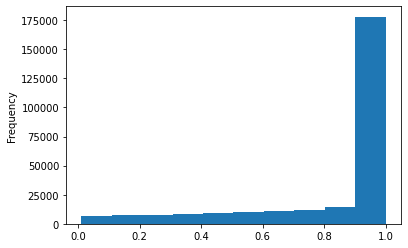

In [20]:
meses['risco_fogo'].plot(kind='hist')

## 3. Modelo de Regressão Linear

In [21]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(normalizador_x.transform(X_treino))
previsao = normalizador_y.inverse_transform(previsao)
print(previsao)

[[0.88141621]
 [0.81105356]
 [0.85321921]
 ...
 [0.8747693 ]
 [0.87064896]
 [0.88084116]]


In [22]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(normalizador_x.transform(X_teste))
y_previsao = normalizador_y.inverse_transform(y_previsao)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}")

O RMSE do modelo linear foi de 0.23769024621130785


##### MODELO DE PREVISÃO

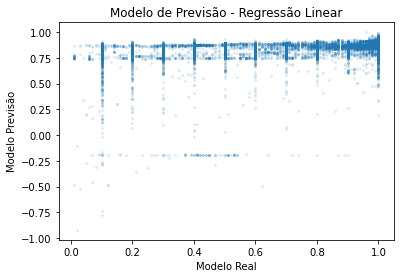

In [23]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Regressão Linear")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 
##### Comparação Baseline & Regressão Linear

O metódo de regressão linear, obteve como RSME:

 <ul>
 <li> O RMSE do modelo linear foi de 0.23769024621130785.  </li>
</ul>

Dado o resultado, observou-se que o erro do modelo apresenta uma taxa de erro de aproximadamente de 23%. Esse modelo ao ser comparado com o Baseline, demonstra apresenta uma eficiência similar ao Baseline, devido a diferença das taxas ser de aproximadamente 2%.

## 4. Árvore de Decisão

In [24]:
# cria o modelo
modelo_dt = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# realiza uma previsão usando o modelo treinado
previsao = modelo_dt.predict(X_teste)
print(previsao)

[0.5959596 0.5959596 0.5959596 ... 0.5959596 0.5959596 0.5959596]


In [25]:
y_verdadeiro = y_teste
y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de árvore de decisões foi de {RMSE}.")

O RMSE do modelo de árvore de decisões foi de 0.08196837971262753.


##### HIPERPARÂMETROS - MODELO BASEADO NO MATERIAL EM SALA

In [26]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_dt = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

    y_verdadeiro = y_teste
    y_previsao = modelo_dt.predict(normalizador_x.transform(X_teste))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


##### HIPERPARÂMETROS - ALTERAÇÃO DOS HIPERPARÂMETROS

In [27]:
NUM_FOLHAS = [None, 4, 10]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad2 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad2.fit(X_treino, y_treino)

    y_verdadeiro_ad2 = y_teste
    y_previsao_ad2 = modelo_ad2.predict(X_teste)
    RMSE_ad2 = mean_squared_error(y_verdadeiro_ad2, y_previsao_ad2, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad2:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.


##### REPRESENTAÇÃO VISUAL DA ÁRVORE DE DECISÕES

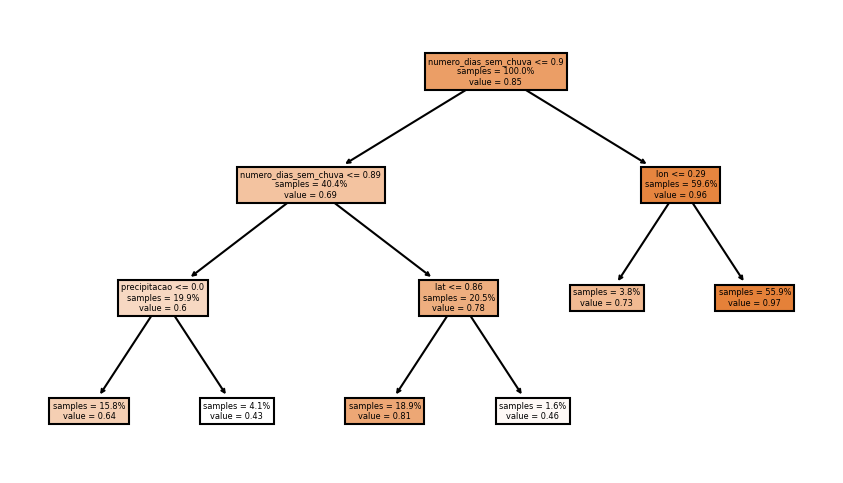

In [28]:
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(normalizador_x.transform(X_treino), normalizador_y.transform(y_treino))

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

##### MODELO DE PREVISÃO

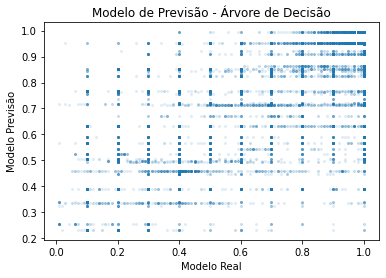

In [29]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Árvore de Decisão")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 
##### Comparação Baseline & Árvore de Decisão

Este modelo, usufrui da utilização de dois hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

## 5. Floresta aleatória

In [30]:
# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# Criação do Modelo
modelo_flore = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

normalizacao = MinMaxScaler()
X_treino_norm = normalizacao.fit_transform(X_treino)
X_teste_norm = normalizacao.transform(X_teste)
modelo_flore.fit(X_treino_norm, y_treino)

previsao = modelo_flore.predict(X_teste_norm)

print(previsao)

(238626, 1) (26515, 1)
(238626,) (26515,)
[0.795  0.69   0.8012 ... 1.     0.9256 1.    ]


In [31]:
y_verdadeiro = y_teste
y_previsao = modelo_flore.predict(X_teste_norm)

RMSE_flore = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo de floresta aleatória foi de {RMSE_flore}.")

O RMSE do modelo de floresta aleatória foi de 0.06663004205483955.


##### DEFINIÇÃO DE HIPERPARÂMETROS - MODELO BASEADO EM SALA

In [32]:
NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=3 foi de 0.20.


##### DEFINIÇÃO DE HIPERPARÂMETROS - MODELO ALTERAÇÕES

In [33]:
NUM_ARVORES = [10, 150, 275]
NUM_FOLHAS = [None, 8]
NUM_PROFUNDIDADE = [None, 4]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=4 foi de 0.19.


##### MODELO DE PREVISÃO

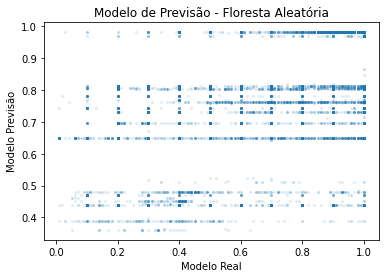

In [34]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Floresta Aleatória")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS 

##### ANALISANDO A IMPORTÂNCIA DAS FEATURES

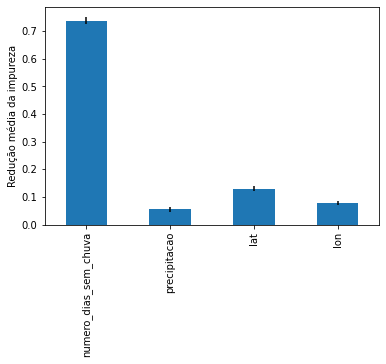

In [35]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

##### Comparação Baseline & Floresta Aleatória

Este modelo, usufrui da utilização de três hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

<hr>

### **TREINO DE MODELOS NÃO - NORMALIZADOS:**

## 1. Baseline

In [36]:
# cria o modelo
modelo_baseline = DummyRegressor()
# treina o modelo
modelo_baseline.fit(X_treino, y_treino)
# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)
print(previsao)

[0.84998961 0.84998961 0.84998961 ... 0.84998961 0.84998961 0.84998961]


In [37]:
y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)
RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 0.2542253273416988.


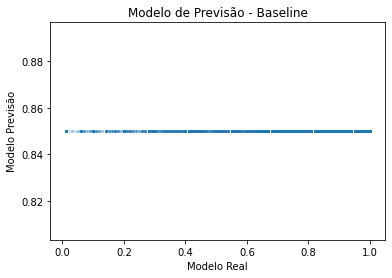

In [38]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Baseline")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

#### ANÁLISE DOS RESULTADOS OBTIDOS


Este modelo realiza a média de todos os valores normalizados do modelo, apresentando uma resolução com eficiência baixa, a qual possui 25% de erro de predição.

## 2. K-vizinhos mais próximos

In [39]:
# cria o modelo
modelo_knm = KNeighborsRegressor()

# treina o modelo
modelo_knm.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knm.predict(X_treino)
print(previsao)

[1.   1.   0.97 ... 1.   0.84 1.  ]


#### Hiperparâmetros - Analisar qual o melhor k-NN

In [40]:
erro = []

for n in range(1, 11):
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    erro.append(np.mean(y_previsao != y_verdadeiro))

    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k = {n} foi de {RMSE}.")

O RMSE do modelo k-NN usando k = 1 foi de 0.08039338505468364.
O RMSE do modelo k-NN usando k = 2 foi de 0.08407120869385942.
O RMSE do modelo k-NN usando k = 3 foi de 0.08834040689107614.
O RMSE do modelo k-NN usando k = 4 foi de 0.09253239184951216.
O RMSE do modelo k-NN usando k = 5 foi de 0.09618881660830106.
O RMSE do modelo k-NN usando k = 6 foi de 0.09913987743295201.
O RMSE do modelo k-NN usando k = 7 foi de 0.1021576465805423.
O RMSE do modelo k-NN usando k = 8 foi de 0.1046688394568031.
O RMSE do modelo k-NN usando k = 9 foi de 0.10709593590475591.
O RMSE do modelo k-NN usando k = 10 foi de 0.10954420439863449.


##### ANÁLISE DOS RESULTADOS OBTIDOS 

Observou-se que em números menores de vizinhos, há uma melhor predição do modelo devido a diminuição da taxa de erro. De modo a realizar esta análise por um meio visual, desenvolve-se uma representação por meio de um gráfico que demonstra a taxa de erro do treino conforme há a mudança dos vizinhos (*k*).

##### REPRESENTAÇÃO VISUAL DO MELHOR *K*

Text(0, 0.5, 'Erro')

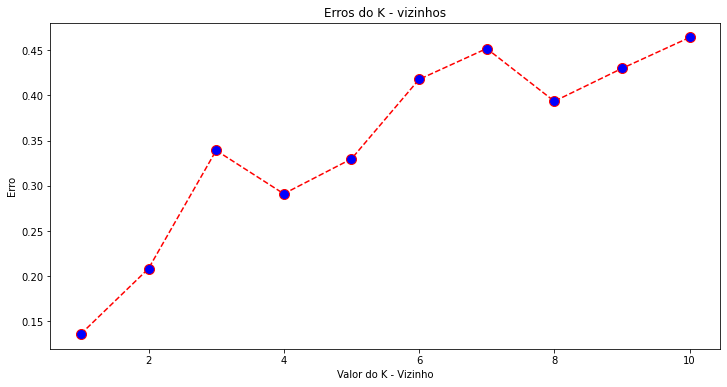

In [41]:
#Plot e caracterização do gráfico
plt.figure(figsize=(12, 6))  
# K analisados de 1 a 10.
plt.plot(range(1, 11), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erros do K - vizinhos')  
plt.xlabel('Valor do K - Vizinho')  
plt.ylabel('Erro') 

##### MODELO DE PREVISÃO

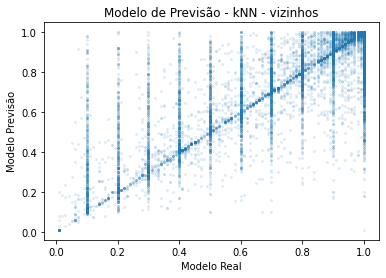

In [42]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - kNN - vizinhos")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### Comparação Baseline & K-NN 

O metódo de k-vizinhos mais próximos foi utilizado com a realização de dez *k* distintos que vão de um a dez. Após uma série de testes, obteve-se os seguintes resultados de RSME:

 <ul>
 <li> O RMSE do modelo k-NN usando k = 1 foi de 0.08039338505468364.  </li>
 <li> O RMSE do modelo k-NN usando k = 2 foi de 0.08407120869385942.  </li>
 <li> O RMSE do modelo k-NN usando k = 3 foi de 0.08834040689107614.  </li>
 <li> O RMSE do modelo k-NN usando k = 4 foi de 0.09253239184951216.  </li>
 <li> O RMSE do modelo k-NN usando k = 5 foi de 0.09618881660830106.  </li>
 <li> O RMSE do modelo k-NN usando k = 6 foi de 0.09913987743295201.  </li>
 <li> O RMSE do modelo k-NN usando k = 7 foi de 0.1021576465805423.   </li>
 <li> O RMSE do modelo k-NN usando k = 8 foi de 0.1046688394568031.   </li>
 <li> O RMSE do modelo k-NN usando k = 9 foi de 0.10709593590475591.  </li>
 <li> O RMSE do modelo k-NN usando k = 10 foi de 0.10954420439863449. </li>
 </ul>

Nestes resultados, observou-se que o erro do modelo apresenta uma taxa de aproximadamente 8 - 10%. Esse modelo ao ser comparado com o Baseline, demonstra uma maior eficiência visto que ela é uma taxa bem menor ao ser comparada com a taxa de 25% de erro do treino obtido com o Baseline. 

## 3. Modelo de Regressão Linear

In [43]:
# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[0.84295707 0.77932213 0.83871419 ... 0.90402853 0.85529304 0.88978477]


In [44]:
y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 0.23769024621130788.


##### MODELO DE PREVISÃO

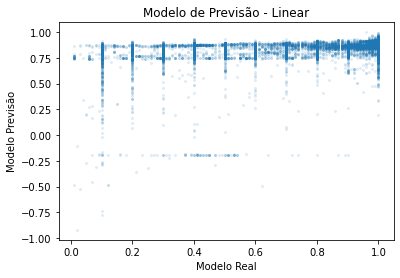

In [45]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Linear")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### Comparação Baseline & Modelo Linear

O metódo de regressão linear, obteve como RSME:

 <ul>
 <li> O RMSE do modelo linear foi de 0.23769024621130785.  </li>
</ul>

Dado o resultado, observou-se que o erro do modelo apresenta uma taxa de erro de aproximadamente de 23%. Esse modelo ao ser comparado com o Baseline, demonstra apresenta uma eficiência similar ao Baseline, devido a diferença das taxas ser de aproximadamente 2%.

## 4. Árvore de Decisão

In [46]:
# cria o modelo
modelo_ad = DecisionTreeRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad = modelo_ad.predict(X_teste)
print(previsao_ad)

[0.8  0.69 0.92 ... 1.   1.   1.  ]


In [47]:
y_verdadeiro = y_teste
y_previsao = modelo_ad.predict(X_teste)

RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad}.")

O RMSE do modelo árvore de decisão foi de 0.08121002222868678.


#### HIPERPARÂMETROS - MODELO BASEADO NO MATERIAL EM SALA

In [48]:
NUM_FOLHAS = [None, 6, 36]
NUM_PROFUNDIDADE = [None, 3, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_ad.predict(X_teste)
    RMSE_ad = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=6 e max_depth=10 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=None foi de 0.17.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=3 foi de 0.20.
O RMSE do modelo AD usando max_leaf_nodes=36 e max_depth=10 foi de 0.17.


#### HIPERPARÂMETROS - ALTERAÇÃO DOS HIPERPARÂMETROS

In [49]:
NUM_FOLHAS = [None, 4, 10]
NUM_PROFUNDIDADE = [None, 5, 10]

for n_folhas, n_profundidade in product(NUM_FOLHAS, NUM_PROFUNDIDADE):
    modelo_ad2 = DecisionTreeRegressor(
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
    )

    modelo_ad2.fit(X_treino, y_treino)

    y_verdadeiro_ad2 = y_teste
    y_previsao_ad2 = modelo_ad2.predict(X_teste)
    RMSE_ad2 = mean_squared_error(y_verdadeiro_ad2, y_previsao_ad2, squared=False)

    print(
        f"O RMSE do modelo AD usando max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE_ad2:.2f}."
    )

O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18.
O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19.
O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.


#### REPRESENTAÇÃO VISUAL DA ÁRVORE DE DECISÕES

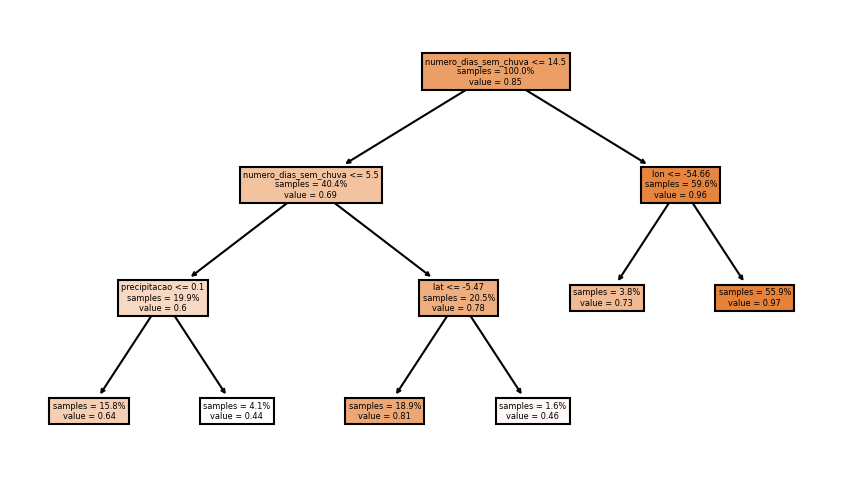

In [50]:
# cria e treina o modelo
modelo_dt = DecisionTreeRegressor(
    max_leaf_nodes=6,
    random_state=SEMENTE_ALEATORIA,
)
modelo_dt.fit(X_treino, y_treino)

# cria os objetos de figura e eixo
fig, axe = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(7, 4),
    dpi=150,
)

# plota o grafo da árvore de decisão
tree.plot_tree(
    modelo_dt,
    feature_names=FEATURES,
    ax=axe,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
)

# mostra o plot para o usuário
plt.show()

#### MODELO DE PREVISÃO

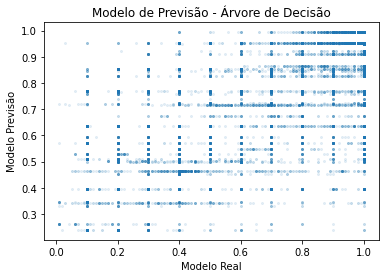

In [51]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Árvore de Decisão")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### Comparação Baseline & Árvore de Decisões

Este modelo, usufrui da utilização de dois hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=None foi de 0.08. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=5 foi de 0.18. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=None e max_depth=10 foi de 0.15. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=None foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=5 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=4 e max_depth=10 foi de 0.21. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=None foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=5 foi de 0.19. </li>
 <li> O RMSE do modelo AD usando max_leaf_nodes=10 e max_depth=10 foi de 0.19.</li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 8-21%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

## 5. Floresta aleatória

In [52]:
# alterando o formato do target
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_ad2 = RandomForestRegressor(random_state=SEMENTE_ALEATORIA)

# treina o modelo
modelo_ad2.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao_ad2 = modelo_ad2.predict(X_teste)
print()
print(previsao_ad2)

(238626,) (26515,)
(238626,) (26515,)

[0.794  0.69   0.812  ... 1.     0.9256 1.    ]


In [53]:
y_verdadeiro = y_teste
y_previsao = modelo_ad2.predict(X_teste)

RMSE_ad2 = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_ad2}.")

O RMSE do modelo árvore de decisão foi de 0.06671535317896182.


##### HIPERPARÂMETROS - MODELO BASEADO NO EM SALA

In [54]:
NUM_ARVORES = [10, 100, 300]
NUM_FOLHAS = [None, 6]
NUM_PROFUNDIDADE = [None, 3]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino_norm, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste_norm)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=None e max_depth=3 foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=300 max_leaf_nodes=6 e max_depth=None foi de 0.20.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=6 e max_depth=3 foi de 0.20.
O RMSE do modelo RF usando n_estimators=100 max_leaf_nodes=6 e max_depth=3 foi de 0.20.


##### HIPERPARÂMETROS - MODELO COM ALTERAÇÕES

In [55]:
NUM_ARVORES = [10, 150, 275]
NUM_FOLHAS = [None, 8]
NUM_PROFUNDIDADE = [None, 4]

for n_folhas, n_profundidade, n_arvores in product(
    NUM_FOLHAS, NUM_PROFUNDIDADE, NUM_ARVORES
):
    modelo_rf = RandomForestRegressor(
        n_estimators=n_arvores,
        max_leaf_nodes=n_folhas,
        max_depth=n_profundidade,
        random_state=SEMENTE_ALEATORIA,
        n_jobs=4,
    )

    modelo_rf.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_rf.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

    print(
        f"O RMSE do modelo RF usando "
        f"n_estimators={n_arvores} max_leaf_nodes={n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE:.2f}."
    )

O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=None foi de 0.07.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=None foi de 0.19.
O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=4 foi de 0.19.
O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=4 foi de 0.19.


#### MODELO DE PREVISÃO

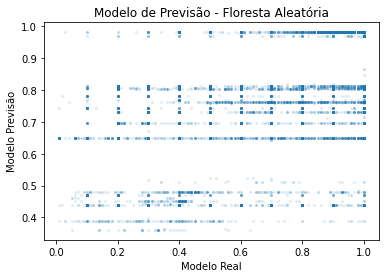

In [56]:
#Plot 
plt.plot(y_verdadeiro, y_previsao, label = 'Teste de Precisão do Dataset', ls="none", marker="o", alpha=0.1, markersize=2)
plt.title("Modelo de Previsão - Floresta Aleatória")
plt.xlabel('Modelo Real')
plt.ylabel('Modelo Previsão')
plt.show()

##### ANÁLISE DOS RESULTADOS OBTIDOS

##### ANÁLISE DA IMPORTÂNCIA DAS FEATURES

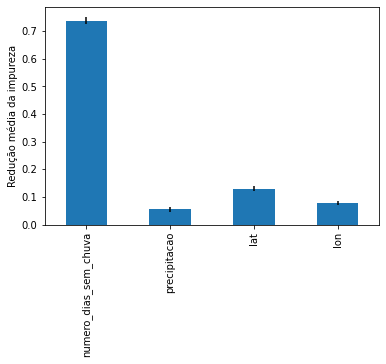

In [57]:
importancia = modelo_rf.feature_importances_
desvio_padrao = np.std(
    [arvore.feature_importances_ for arvore in modelo_rf.estimators_], axis=0
)

serie_importancia = pd.Series(importancia, index=FEATURES)

fig, axe = plt.subplots()
serie_importancia.plot.bar(yerr=desvio_padrao, ax=axe)
axe.set_ylabel("Redução média da impureza")
plt.show()

##### Comparação Baseline & Floresta Aleatória

Este modelo, usufrui da utilização de três hiperparâmetros que foram alterados de acordo com o desejo das discentes. Dada as alterações dos hiperparâmetros, os RMSE obtidos foram de:
<ul>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=None foi de 0.07. </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=None e max_depth=4 foi de 0.19.     </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=None e max_depth=4 foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=None e max_depth=4 foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=None foi de 0.19.     </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=None foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=None foi de 0.19.    </li>
<li> O RMSE do modelo RF usando n_estimators=10 max_leaf_nodes=8 e max_depth=4 foi de 0.19.        </li>
<li> O RMSE do modelo RF usando n_estimators=150 max_leaf_nodes=8 e max_depth=4 foi de 0.19.       </li>
<li> O RMSE do modelo RF usando n_estimators=275 max_leaf_nodes=8 e max_depth=4 foi de 0.19.       </li>
</ul>

Estes RMSE apresentam uma grande margem de variação, visto que as taxas vão de 7-19%. Nesse sentido observa-se que aquelas em que o max_depht são igualadas a None, os valores de erro serão menores.

<hr>

## Classificador
### em KNN

In [58]:
# categorizando os dados
logic = meses["risco_fogo"] <= 0.2
print(len(meses.loc[logic]),'Risco Baixo')
logic = (meses["risco_fogo"] > 0.2) & (meses["risco_fogo"]<= 0.4)
print(len(meses.loc[logic]),'Risco Baixo-Médio')
logic = (meses["risco_fogo"] > 0.4) & (meses["risco_fogo"] <= 0.6)
print(len(meses.loc[logic]),'Risco Médio')
logic = (meses["risco_fogo"] > 0.6) & (meses["risco_fogo"] <= 0.8)
print(len(meses.loc[logic]),'Risco Médio-Alto')
logic = (meses["risco_fogo"] > 0.8)
print(len(meses.loc[logic]),'Risco Alto')

13853 Risco Baixo
16018 Risco Baixo-Médio
19324 Risco Médio
23407 Risco Médio-Alto
192539 Risco Alto


In [59]:
meses['Risco Categórico'] = None

logic = meses["risco_fogo"] <= 0.2
meses.loc[logic, 'Risco Categórico'] = 'Risco Baixo'
logic = (meses["risco_fogo"] > 0.2) & (meses["risco_fogo"]<= 0.4)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio-Baixo'
logic = (meses["risco_fogo"] > 0.4) & (meses["risco_fogo"] <= 0.6)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio'
logic = (meses["risco_fogo"] > 0.6) & (meses["risco_fogo"] <= 0.8)
meses.loc[logic, 'Risco Categórico'] = 'Risco Médio-Alto'
logic = (meses["risco_fogo"] > 0.8)
meses.loc[logic, 'Risco Categórico'] = 'Risco Alto'
print(meses)

              lat        lon        data_hora_gmt  numero_dias_sem_chuva  \
0      -12.314859 -43.234066  2022-03-02 01:05:48                    9.0   
1      -20.227880 -46.415940  2022-03-02 01:28:00                    8.0   
2      -20.229250 -46.426820  2022-03-02 01:28:00                    8.0   
3      -20.238930 -46.425510  2022-03-02 01:28:00                    8.0   
4      -20.237550 -46.414600  2022-03-02 01:28:00                    8.0   
...           ...        ...                  ...                    ...   
265136  -6.360000 -45.670000  2022-07-29 23:54:47                   46.0   
265137  -6.360000 -45.690000  2022-07-29 23:54:47                   46.0   
265138  -6.400000 -44.140000  2022-07-29 23:54:47                   34.0   
265139  -6.350000 -45.670000  2022-07-29 23:54:47                   46.0   
265140  -6.340000 -45.690000  2022-07-29 23:54:47                   45.0   

        precipitacao  risco_fogo   Risco Categórico  
0                2.7         1.0 

In [60]:
TAMANHO_TESTE = 0.1 # fração de dados utilizada para teste: 10%
SEMENTE_ALEATORIA = 61455 # semente escolhida aleatoriamente
DATASET_NAME = "meses"
FEATURES = ["numero_dias_sem_chuva", "precipitacao", "lat", "lon"]
TARGET = ["Risco Categórico"]

indices = meses.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

meses_treino = meses.loc[indices_treino]
meses_teste = meses.loc[indices_teste]

X_treino = meses_treino.reindex(FEATURES, axis=1).values
y_treino = meses_treino.reindex(TARGET, axis=1).values
X_teste = meses_teste.reindex(FEATURES, axis=1).values
y_teste = meses_teste.reindex(TARGET, axis=1).values

In [61]:
print(y_treino.shape, y_teste.shape)
y_treino = y_treino.ravel()
y_teste = y_teste.ravel()
print(y_treino.shape, y_teste.shape)

# cria o modelo
modelo_knn = KNeighborsClassifier()

# treina o modelo
modelo_knn.fit(X_treino,y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

(238626, 1) (26515, 1)
(238626,) (26515,)
['Risco Médio-Alto' 'Risco Médio-Alto' 'Risco Alto' ... 'Risco Alto'
 'Risco Alto' 'Risco Alto']


In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
#let us get the predictions using the classifier we had fit above
y_pred = modelo_knn.predict(X_teste)
confusion_matrix(y_teste,y_pred)
pd.crosstab(y_teste, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Risco Alto,Risco Baixo,Risco Médio,Risco Médio-Alto,Risco Médio-Baixo,All
True,,,,,,
Risco Alto,18769,63,129,271,68,19300
Risco Baixo,87,1103,47,29,92,1358
Risco Médio,194,52,1470,129,84,1929
Risco Médio-Alto,433,35,175,1643,42,2328
Risco Médio-Baixo,126,89,176,52,1157,1600
All,19609,1342,1997,2124,1443,26515


Text(0.5, 15.0, 'Predicted label')

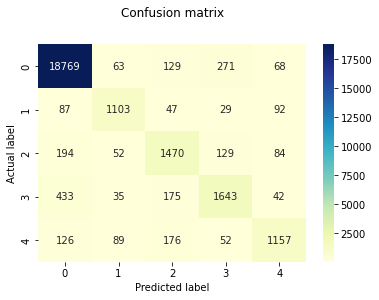

In [64]:
#let us get the predictions using the classifier we had fit above
y_pred = modelo_knn.predict(X_teste)
confusion_matrix(y_teste,y_pred)
pd.crosstab(y_teste, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

y_pred = modelo_knn.predict(X_teste)
c_matrix = confusion_matrix(y_teste, y_pred)
p = sns.heatmap(pd.DataFrame(c_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print(classification_report(y_teste,y_pred))

                   precision    recall  f1-score   support

       Risco Alto       0.96      0.97      0.96     19300
      Risco Baixo       0.82      0.81      0.82      1358
      Risco Médio       0.74      0.76      0.75      1929
 Risco Médio-Alto       0.77      0.71      0.74      2328
Risco Médio-Baixo       0.80      0.72      0.76      1600

         accuracy                           0.91     26515
        macro avg       0.82      0.80      0.81     26515
     weighted avg       0.91      0.91      0.91     26515



In [66]:
accuracy_score(y_teste, y_pred)

0.9105034885913634

## Comparando os desempenhos dos modelos de regressão 

Para comparar os cinco modelos preditivos desenvolvidos, comparamos os valores de RMSE e de precisão, a fim de determinar qual deles possuia o melhor desempenho. Para tanto, nós colocamos esses valores em uma tabela, e obtemos o seguinte resultado: 
</p>

| Modelo | Normalizado | Não Normalizado |
| :---       |     :---:      |   ---:        |
| Baseline   | 0,25423701     | 0,25297497    |
| 1 K-NN     | 0,06953842     | 0,08039338    |
| 2 K-NN     | 0,07485483     | 0,084071208   |
| 3 K-NN     | 0,08021297     | 0,088340406   |
| 4 K-NN     | 0,08474465     | 0,092532391   |
| 5 K-NN     | 0,08843453     | 0,096188816   |
| 6 K-NN     | 0,09124067     | 0,099139877   |
| 7 K-NN     | 0,09396136     | 0,1021576465  |
| 8 K-NN     | 0,09655897     | 0,1046688394  |
| Regressão  | 0,23769020     | 0,2370621     |
| Árvore     | 0,08           | 0,08          |
| Floresta   | 0,066630042    | 0,0667153531  |

Podemos perceber, pois, que tanto para o s dados normalizados quanto para os dados não normalizados, os melhores modelos preditivos (isto é, os que resultam em melhor previsão) são os de FLoresta aleatória e o de K-NN. 
Direcionando nosso olhar para o K-NN, podemos perceber, também, que os melhores resultados desse modelo são obtidos com menores números de vizinhos selecionados.
Isso ocorre pois, no caso dos nossos dados, quando realizamos o modelo K-NN com uma grande quantidade de vizinhos, nós estamos nos "afastando" muito da área que está sendo utilizada para predição, o que torna as previsões menos precisas.
O gráfico presente na seção "K-NN vizinhos" mostra exatamente como o erro desse modelo cresce conforme aumentamos o número de vizinhos analisados:

Text(0, 0.5, 'Erro')

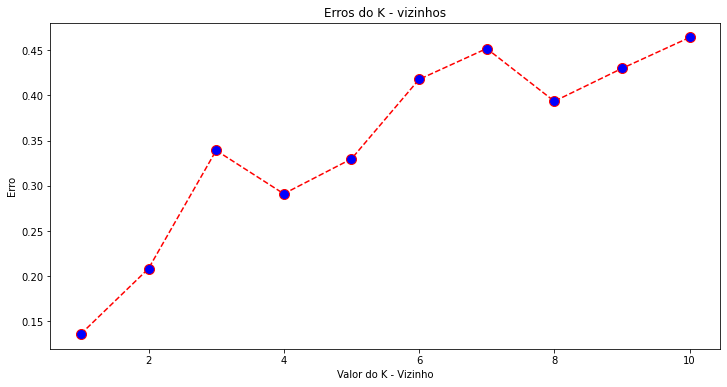

In [67]:
#Plot e caracterização do gráfico
plt.figure(figsize=(12, 6))  
# K analisados de 1 a 10.
plt.plot(range(1, 11), erro, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Erros do K - vizinhos')  
plt.xlabel('Valor do K - Vizinho')  
plt.ylabel('Erro') 